<img src="Analysis_repo\Images\data_logo.png" alt="Data_Logo" title="Data_Logo" style="float:right;margin-right: 7px;" width="150"/>

## Federal Reserve Data Analytics
### _Consumer Credit Analytics_

### [1] Summary and introduction to the study  

Mismanaged risk in dealing with consumer credit data formed a key component during the global financial crisis in 2008. Many lessons were learned from that market crash with regards to dealing with un-securtized consumer credit and general credit. 

In this study we are going to examine consumer credit data since the global financial crisis and see if we have learned our lessons and where we can improve our understanding of global market credit risk in our ever increasingly interconnected world.<br><br>

<b>_1.1 - What does this data represent?_</b><br>
The following data is time series consumer credit data collected by the Federal Reserve Bank on a month-to-month basis. This data amongst other data is used to analyse the credit health of the American consumers. The time period under consideration is for the past decade, 2013 to 2023. 

_Disclaimer: An update is pending to make it so that users can pick a time period that they desire to analyse the data_<br><br>

<b>_1.2 - Purpose of analysis?_</b><br>
The purpose of this study is analyse the consumer credit data through various methods including using this very data to create models that can be used to uncover relationships and predict trends in the consumer credit through various market cycles over time.<br><br>

<b>_1.3 - Who is this analysis useful to?_</b><br>
This analysis is useful to various stakeholders including:
- companies that offer credit services to clients, 
- banks, 
- educational institutions and many other organizations.<br><br>

<b>_1.4 - The Economic data we are going to focus in on this study are_:</b><br>

1. Net overall consumer credit data<br>

2. Total consumer credit data:
    - Revolving Total consumer credit owned.
    - Non-revolving total consumer credit owned.<br>
3. Total consumer credit owned and securitized data:
    - Revolving Total consumer credit owned and securitized
    - Non-revolving total consumer credit owned and securitized<br>
3. Non-revolving consumer credit data owned by:
    - Finance companies
    - Non-financial companies
    - Non-profit and educational institutions
    - Federal Government
    - Credit unions<br>
4. Revolving consumer credit data owned by:
    - Finance companies
    - Non-financial companies
    - Non-profit and educational institutions
    - Federal Government
    - Credit unions<br>

<b>_1.5 - Questions that we seek to answer in this study:_</b><br>

1. Rear view question 
2. rear view question
3. How does consumer credit change over time in relation to the FED interest rate? 
4. How does consumer credit change over time in relation to the FED interest rate? 
5. How does consumer credit change over time in relation to the FED interest rate? 
6. How does consumer credit change over time in relation to the FED interest rate? 
7. How does consumer credit change over time in relation to the FED interest rate? 
8. future based question
9. future based question
10. Conclusion 

<b>_1.6 - Data source(s):_</b><br>
- Consumer credit data: https://www.federalreserve.gov/releases/g19/current/default.htm


### [2] Data study and general imports

In [3]:
# import 
import Analysis_repo
from Analysis_repo import sourceCode
from Analysis_repo import notebook_import_library as importLibrary


# Get the data form the Source code file
try:
    consumer_credit_data = sourceCode.sendConsumerCreditData()[5:].reset_index() # get consumer credit data
    consumer_credit_data_for_analysis = consumer_credit_data.copy() # df to be used for actual analysis
    consumer_credit_data_for_analysis = consumer_credit_data_for_analysis.drop(["index"], axis=1) # remove  default index column
except Exception as e:
    print("An exception occurred:", e)
    
#consumer_credit_data_for_analysis[0:]

#### [2.1] Data Study

In [4]:
consumer_credit_data_for_analysis.columns

Index(['Series Description',
       'Total consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
       'Total consumer credit owned and securitized, not seasonally adjusted flow, monthly rate',
       'Total securitized consumer credit, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned by depository institutions, not seasonally adjusted flow, monthly rate',
       'Total consumer credit owned by commercial banks, not seasonally adjusted flow, monthly rate (discontinued after February 2011)',
       'Total consumer credit owned by savings institutions, not seasonally adjusted flow, monthly rate (discontinued aft

#### [2.2] Visualizations analysis

##### [2.2.1] Plot Data Zone

In [5]:
# Data
credit_date = consumer_credit_data_for_analysis["Series Description"]
net_non_rev_credit = consumer_credit_data_for_analysis["Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate"]
net_rev_credit = consumer_credit_data_for_analysis["Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate"]

# owned_n_securitized_credit = consumer_credit_data_for_analysis["Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate"]


# Total cons credit by type df
Net_consumer_credit_by_type_df = importLibrary.pd.DataFrame()
Net_consumer_credit_by_type_df['Credit Date'] = credit_date
Net_consumer_credit_by_type_df['Net Nonrevolving Credit'] = net_non_rev_credit.astype(float) 
Net_consumer_credit_by_type_df['Net Revolving Credit'] = net_rev_credit.astype(float) 

Year_list = [] #store year values
for year_value in credit_date: # create list of year values
    Year_list.append(year_value[:4])

Net_consumer_credit_by_type_df['Year'] = Year_list # create year column
Net_consumer_credit_by_type_df['Year']  = Net_consumer_credit_by_type_df['Year'] .astype(int) 

grouped_data = Net_consumer_credit_by_type_df.groupby('Year')[['Net Nonrevolving Credit', 
                                                                'Net Revolving Credit']].sum().reset_index()

# setting data by quarter

NR_credit_owned = importLibrary.pd.DataFrame()
NR_credit_owned['Credit Date'] = credit_date
NR_credit_owned['Year'] = Year_list # create year column
NR_credit_owned['Year']  = NR_credit_owned['Year'] .astype(int)
NR_credit_owned['Credit Unions']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by credit unions, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Finance companies']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by finance companies, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Federal government']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by federal government, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Non-Profit and Educational']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by nonprofit and educational institutions, not seasonally adjusted flow, monthly rate'] .astype(float) 
NR_credit_owned['Non-financial']  = consumer_credit_data_for_analysis['Nonrevolving consumer credit owned by nonfinancial business, not seasonally adjusted flow, monthly rate'] .astype(float) 



Quarter_list= []
for date_value in credit_date:
    month = int(date_value[-2:])
    q_value = 0
    
    if(1 <= month <= 3): q_value = 1 # From jan to Mar
    elif(4 <= month <= 6): q_value = 2 # from Apr to Jun
    elif(7 <= month <= 9): q_value = 3 # from Jul to Sep
    elif(10 <= month <= 12): q_value = 4 # from Oct to Dec
    
    Quarter_list.append(q_value) # add quarter value to list.
    
NR_credit_owned['Quarter'] = Quarter_list # create quarter column
NR_credit_owned['Quarter']  = NR_credit_owned['Quarter'] .astype(int) 

quarter_grouped_data = NR_credit_owned.groupby(['Year', 'Quarter'])[['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial']].sum().reset_index()
 
 	
 		
 




## 

# Consumer_credit_df = importLibrary.pd.DataFrame()
# Consumer_credit_df['Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate'] = credit_date
# Consumer_credit_df['Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate'] = net_non_rev_credit.astype(float) 

# # Revolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate',
# #        'Nonrevolving consumer credit owned and securitized, seasonally adjusted flow, monthly rate'
#     #    'Total consumer credit owned and securitized, not seasonally adjusted flow, monthly rate',
#     #    'Total securitized consumer credit, not seasonally adjusted flow, monthly rate',

# grouped_data = Net_consumer_credit_by_type_df.groupby('Year')[['Net Revolving Credit', 'Net Nonrevolving Credit']].agg('sum').reset_index()


In [6]:
quarter_grouped_data

,Year,Quarter,Credit Unions,Finance companies,Federal government,Non-Profit and Educational,Non-financial
0,2013,1,1406.85,-4106.15,42988.42,-1787.92,-100.31
1,2013,2,6846.52,2677.05,15333.96,-1777.52,-163.44
2,2013,3,7764.23,4543.78,39503.80,-1827.35,34.85
3,2013,4,1403.68,516.73,15443.35,-791.01,-258.11
4,2014,1,4929.77,-4690.85,41032.75,-1195.88,-105.11
5,2014,2,13049.09,2437.53,15247.85,-1160.44,-165.69
6,2014,3,8596.51,6051.39,41222.39,-1946.80,29.63
7,2014,4,5461.58,7948.55,13228.30,58.82,-251.85
8,2015,1,6279.57,-3141.59,41033.43,-759.06,-501.13
9,2015,2,10472.08,3892.14,14080.91,-776.50,-557.36


##### [2.2.2] Actual Plots

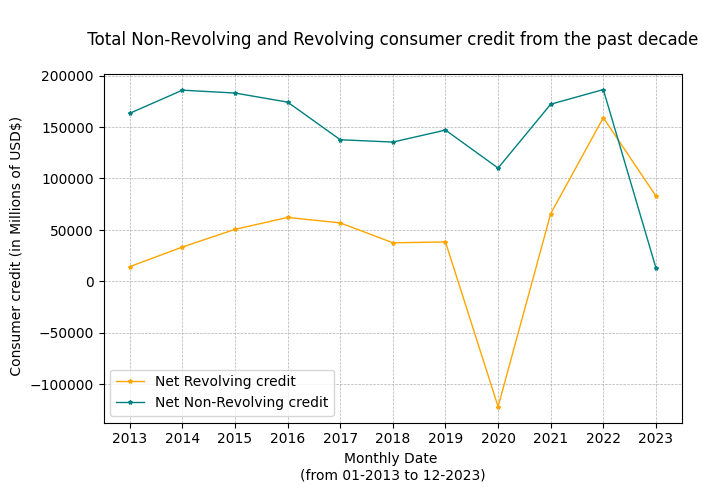

In [7]:
# Total consumer credit for each year for the past 10 years by Revolving and Non-revolving consumer credit data

importLibrary.plt.figure(figsize=(7, 5)) # setting plot size

# Creating line plots
importLibrary.plt.plot(grouped_data['Year'], grouped_data['Net Revolving Credit'], color='orange', marker='*', linestyle='-', linewidth=1, markersize=3, label='Net Revolving credit')
importLibrary.plt.plot(grouped_data['Year'], grouped_data['Net Nonrevolving Credit'], color='teal', marker='*', linestyle='-', linewidth=1, markersize=3, label='Net Non-Revolving credit')

# Add labels and title
importLibrary.plt.title('\n Total Non-Revolving and Revolving consumer credit from the past decade \n')
importLibrary.plt.xlabel('Monthly Date \n(from 01-2013 to 12-2023)')
importLibrary.plt.xticks(grouped_data['Year']) # hide the date tick labels
importLibrary.plt.ylabel(' Consumer credit (in Millions of USD$)')
importLibrary.plt.tight_layout(pad=1) # opens spaces of for percentages on y-axis
importLibrary.plt.legend(loc='lower left')

# Cutomize grid on the plot
importLibrary.plt.grid(True, linestyle='--', linewidth=0.5, which='both') # plot grid



- _Plot observation_ : <br> From this Line graph we can observe the [Revolving Credit](#Dictionary) had a sharp decline between 2019 and 2020, the peak global pandemic years, 2020 to 2021, the credit type rebounded to a new high in 8 years and kept on increasing till 2022. The [Non-Revolving Credit](#Dictionary) remained in a fair range between 2013 and 2022, and both the Revolving and non- revolving dcreased sharply between 2022 and 2023.


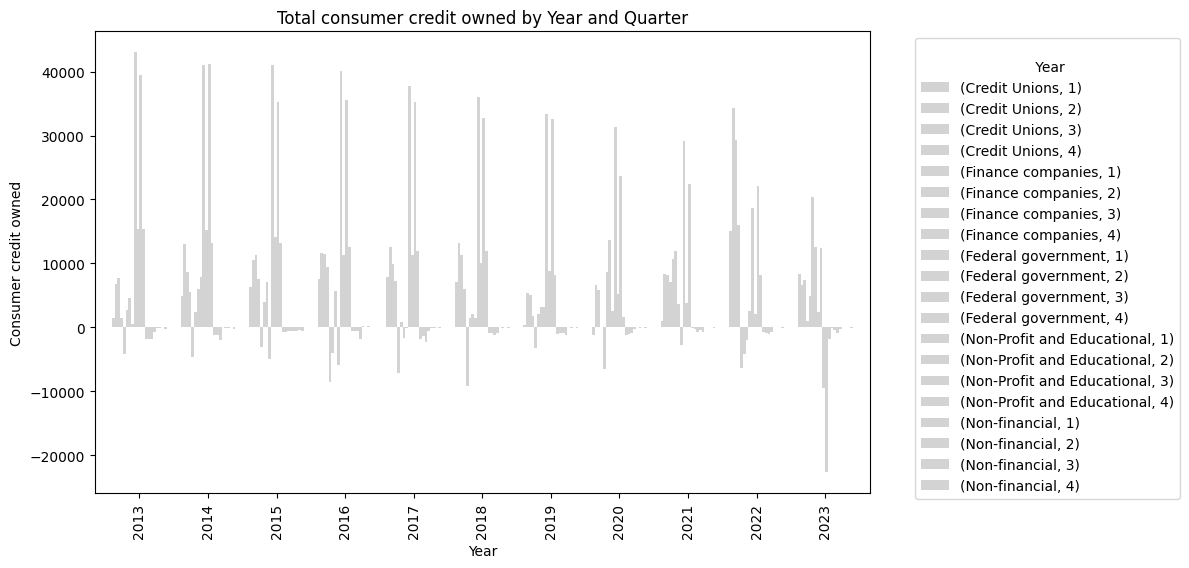

In [17]:
#Seasonality plot

pivot_data = quarter_grouped_data.pivot(index='Year', columns='Quarter', values=['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial'])

# Plotting
fig, ax = importLibrary.plt.subplots(figsize=(10, 6))

# colors = importLibrary.plt.cm.get_cmap('Set3', len(pivot_data.columns)) # set colors by owner of consumer credit

# Plot each column with the same color
credit_Owner_color_index = {
    '(Federal government, 1)': 'violet',
    '(Federal government, 2)': 'violet',
    '(Federal government, 3)': 'violet',
    '(Federal government, 4)': 'violet',
    '(Credit Unions, 1)': 'pink',
    '(Credit Unions, 2)': 'pink',
    '(Credit Unions, 3)': 'pink',
    '(Credit Unions, 4)': 'pink',
    '(Finance companies, 1)': 'yellow',
    '(Finance companies, 2)': 'yellow',
    '(Finance companies, 3)': 'yellow',
    '(Finance companies, 4)': 'yellow',
    '(Non-Profit and Educational, 1)': 'green',
    '(Non-Profit and Educational, 2)': 'green',
    '(Non-Profit and Educational, 3)': 'green',
    '(Non-Profit and Educational, 4)': 'green',
    '(Non-financial, 1)': 'orange',
    '(Non-financial, 2)': 'orange',
    '(Non-financial, 3)': 'orange',
    '(Non-financial, 4)': 'orange',
    2022: 'blue',
    2023: 'green',
    2024: 'red',
}

# Specify colors for certain columns
colors_for_columns = {
    2022: 'blue',
    2023: 'green',
    2024: 'red',
}

# Create a custom color map
cmap = importLibrary.ColorMap([colors_for_columns.get(col, 'lightgray') for col in pivot_data.columns])

# Plotting
#fig, ax = importLibrary.plt.subplots(figsize=(10, 6))

pivot_data.plot(kind='bar', ax=ax, colormap=cmap, width=0.8)     

# Add labels and title
importLibrary.plt.xlabel('Year')
importLibrary.plt.ylabel('Consumer credit owned')
importLibrary.plt.title('Total consumer credit owned by Year and Quarter')

# Add legend
importLibrary.plt.legend(title='\n Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
importLibrary.plt.show()



In [9]:
# #Seasonality plot

# pivot_data = quarter_grouped_data.pivot(index='Year', columns='Quarter', values=['Credit Unions', 'Finance companies', 'Federal government', 'Non-Profit and Educational', 'Non-financial'])

# # Plotting
# fig, ax = importLibrary.plt.subplots(figsize=(10, 6))


# colors = importLibrary.plt.cm.get_cmap('Set3', len(pivot_data.columns)) # set colors by owner of consumer credit

# # Plot each column with the same color
# for i, (year, color) in enumerate(zip(pivot_data.columns, colors(range(len(pivot_data.columns))))):
#     if(pivot_data.columns[i][0] == 'Credit Unions'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='blue', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Finance companies'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='yellow', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Federal government'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='green', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Non-Profit and Educational'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='brown', label=pivot_data.columns[i][0], width=0.8, position=i)
#     elif(pivot_data.columns[i][0] == 'Non-financial'):
#         pivot_data['Quarter'].plot(kind='bar', ax=ax, color='red', label=pivot_data.columns[i], width=0.8, position=i)
        
        

# # Add labels and title
# importLibrary.plt.xlabel('Quarter')
# importLibrary.plt.ylabel('Sum of Values')
# importLibrary.plt.title('Sum of Values Grouped by Year and Quarter')

# # Add legend
# importLibrary.plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# importLibrary.plt.show()



In [ ]:
pivot_cols = pivot_data.columns
pivot_cols

MultiIndex([(             'Credit Unions', 1),
            (             'Credit Unions', 2),
            (             'Credit Unions', 3),
            (             'Credit Unions', 4),
            (         'Finance companies', 1),
            (         'Finance companies', 2),
            (         'Finance companies', 3),
            (         'Finance companies', 4),
            (        'Federal government', 1),
            (        'Federal government', 2),
            (        'Federal government', 3),
            (        'Federal government', 4),
            ('Non-Profit and Educational', 1),
            ('Non-Profit and Educational', 2),
            ('Non-Profit and Educational', 3),
            ('Non-Profit and Educational', 4),
            (             'Non-financial', 1),
            (             'Non-financial', 2),
            (             'Non-financial', 3),
            (             'Non-financial', 4)],
           names=[None, 'Quarter'])


### [3] Regression Modelling

In this section we will make use of a regression to predict the class type of credit card transaction. The 'Class' column in the _creditcardData-analyis_ will be used as the independent variable and all the other the columns will used as the dependent variables in out study.

For this study we want to determine, hoiw effective are a are certain input as vaiable indicators in determing teh class type of the transaction. We will use to model outputs to test effectiveness of the model by focusing on its key metrics such as the $R^2$, Mean Squared Error, Mean Absolute Error to mention few.


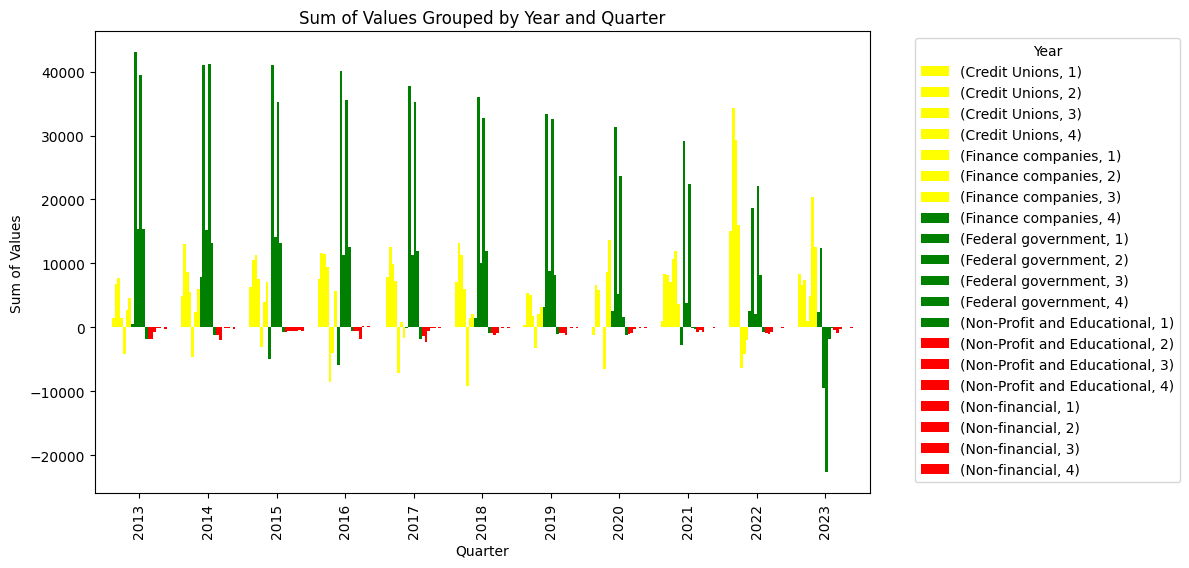

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sample data
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')
data = np.random.randint(1, 100, len(date_rng))

# Create a DataFrame
df = pd.DataFrame({'Date': date_rng, 'Value': data})

# Extract year and quarter from the Date column
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

# Group data by year and quarter, and calculate the sum of values
grouped_data = df.groupby(['Year', 'Quarter'])['Value'].sum().reset_index()

# Pivot the DataFrame for plotting
pivo_data = grouped_data.pivot(index='Quarter', columns='Year', values='Value')

# Specify colors for certain columns
value23 = '(Federal government, 1)'
value33 = '(Federal government, 2)'
colors_for_columns = {
    value23: 'violet',
    value33: 'violet',
    2022: 'yellow',
    2023: 'green',
    2024: 'red',
}

# Create a custom color map
cmap = ListedColormap([colors_for_columns.get(col, 'lightgray') for col in pivo_data.columns])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

pivot_data.plot(kind='bar', ax=ax, colormap=cmap, width=0.8)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year and Quarter')

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [13]:
pivo_data.columns

Index([2022, 2023, 2024], dtype='int32', name='Year')

### [4] Decision Tree Modelling

In this section I made use a decison tree model to predict if a credit card. In previous model we created a model
using regression modelling, however as we see in our regression model conclusion the model is not accurate enough in predicting the degree of relationships that exist between the independent and dependent variables in our study.

Decison tree models are more effective in uncovering relationships in linear and complex relationships that exist between the independent and dependent variables in our study.Decision tree models also handle missing data better, more versatile for classification and regression purposes.

In the following cells we will implement a decision tree model and use the model to predict the degree of relationships between the independent and dependent variables in our study and test its effectiveness.

C:\Users\stanf\AppData\Local\Temp\ipykernel_3156\1816057481.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(pivot_data.columns))


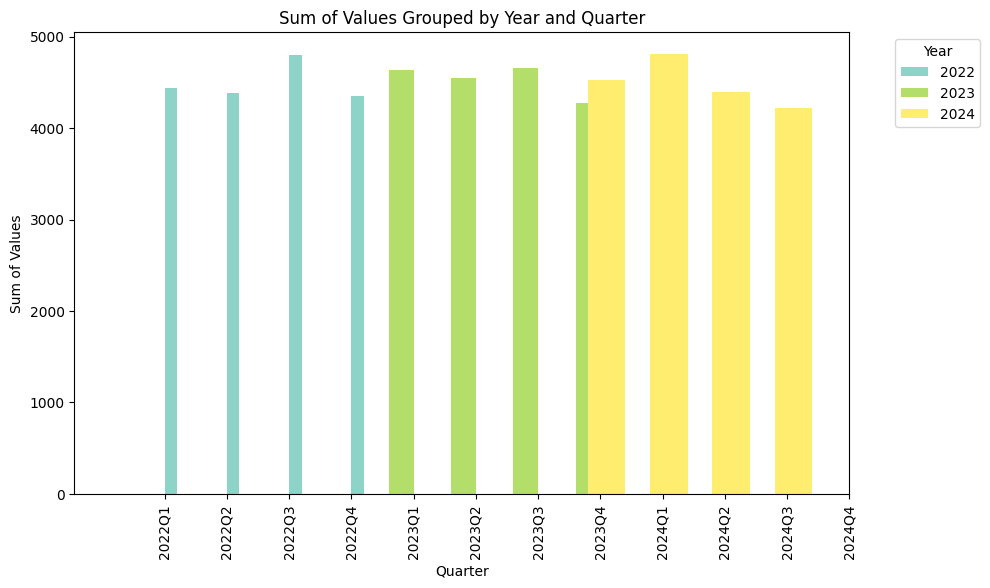

### Dictionary

1. <b>Revolving credit</b><br> A type of credit that allows borrowers to repeatedly borrow up to a certain credit limit. As the borrower repays the outstanding balance, the available credit is replenished, and they can use it again. Credit cards and lines of credit are common examples of revolving credit.<br>

2. <b>Non-revolving credit</b><br>A one-time loan that is typically repaid in fixed installments over a specified period. Once the borrower repays the loan, the credit is no longer available. Installment loans for major purchases, such as auto loans or student loans, fall under the category of non-revolving credit.





### [6] References